<a href="https://colab.research.google.com/github/salimunlu47/scipy-optimization-examples/blob/main/scipy_optimize_basinhopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Find the global minimum of a function using the basin-hopping algorithm**

The following example is a 1-D minimization problem, with many local minima superimposed on a parabola.

In [1]:
from scipy.optimize import basinhopping
import numpy as np

In [2]:
func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x

In [3]:
x0=[1.]
x0

[1.0]

In [4]:
#In numerical optimization, the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm is an iterative method for solving unconstrained nonlinear optimization problems.
minimizer_kwargs = {"method": "BFGS"}

In [5]:
basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, niter=200)

                        fun: -1.0008761844426555
 lowest_optimization_result:       fun: -1.0008761844426555
 hess_inv: array([[0.0047126]])
      jac: array([1.62422657e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.19506755])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4608
                        nit: 200
                       njev: 1536
                          x: array([-0.19506755])

In [6]:
ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, niter=200)
print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

global minimum: x = -0.1951, f(x0) = -1.0009


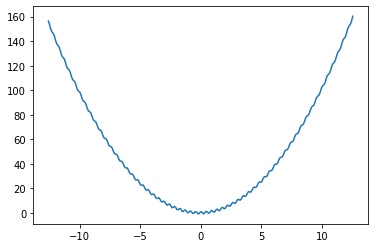

In [7]:
x = np.arange(-4*np.pi,4*np.pi,0.1)   # start,stop,step
y = np.cos(14.5 * x - 0.3) + (x + 0.2) * x
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

Next consider a 2-D minimization problem. Also, this time, we will use gradient information to significantly speed up the search.

In [8]:
def func2d(x):
  f = np.cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] + 0.2) * x[0]
  df = np.zeros(2)
  df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
  df[1] = 2. * x[1] + 0.2
  return f, df

We’ll also use a different local minimization algorithm. Also, we must tell the minimizer that our function returns both energy and gradient (Jacobian).

In [9]:
minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}

In [10]:
x0 = [1.0, 1.0]

In [11]:
basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=200)

                        fun: -1.0108761844426555
 lowest_optimization_result:       fun: -1.0108761844426555
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.35804241e-07,  5.79722381e-12])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 10
   status: 0
  success: True
        x: array([-0.19506755, -0.1       ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2661
                        nit: 200
                          x: array([-0.19506755, -0.1       ])

In [12]:
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs, niter=200)
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (ret.x[0],
                                                          ret.x[1],
                                                          ret.fun))

global minimum: x = [-0.1951, -0.1000], f(x0) = -1.0109
